<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>

### Your information:
- Fullname: Tran Dat
- Place of birth: District 5, HCM City
- Email: trandat100185@gmail.com

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import lib as lib
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
# code here

In [3]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()

In [4]:
dataset = pd.read_csv("loan_train.csv", index_col=0)
dataset.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
dataset = dataset.iloc[:,1:]
dataset.shape

(346, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 399
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(3), object(5)
memory usage: 24.3+ KB


In [7]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
dataset.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [9]:
dataset.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [10]:
dataset.describe(include="all")

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346,346.000000,346.000000,346,346,346.000000,346,346
unique,2,NaN,NaN,7,23,NaN,4,2
top,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,260,NaN,NaN,166,90,NaN,151,294
mean,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


## Identify Variables

In [11]:
number_type = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
", ".join(number_type)

'Principal, terms, age'

#### Continuous variable but its unique value is less than 5% of total record. We consider them as category variable

In [12]:
for col in number_type:
    if (len(dataset[col].unique()) < dataset.shape[0] * 0.05):
        print(col, "\t", len(dataset[col].unique()), ":", dataset[col].unique())

Principal 	 5 : [1000  800  300  900  500]
terms 	 3 : [30 15  7]


In [13]:
cat_type = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
# Add two category continous variable
cat_type.extend(['Principal', 'terms'])
cat_type

['loan_status',
 'effective_date',
 'due_date',
 'education',
 'Gender',
 'Principal',
 'terms']

#### We have these continous variable: 
* age

## Univariate Analysis

In [14]:
lib.continous_analysis(dataset, 'age')

***** age *****
age mean: 30.939306358381504
age median: 30.0
age mode: [26]
age range: 33
age min: 18
age max: 51
age variance: 36.47456647398844
age std: 6.039417726402806
age skew: 0.700410003463071
age kur: 0.4810630956818449
The distribution of age is right(positive) skew
The distribution of age is upper normal distribution




/home/dat-tran/Desktop/python/data_scientist/projects/loan_is_paid_off_or_in_collection/lib.py:17: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  print(col, "range:", colSeri.ptp())


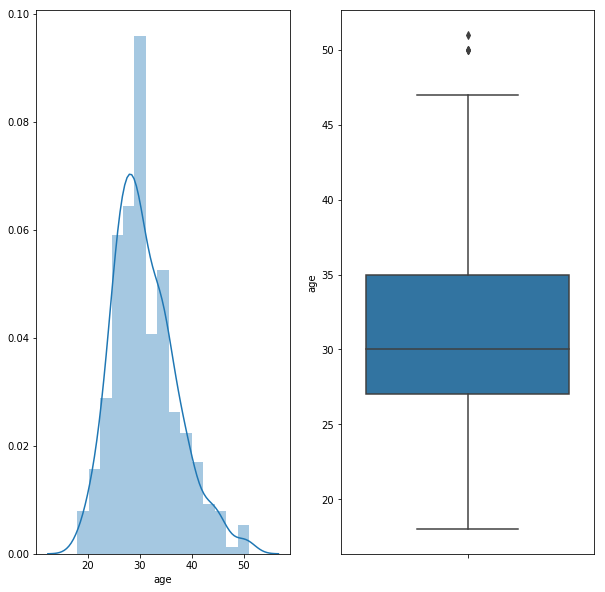

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sb.distplot(dataset.age)
plt.subplot(1,2,2)
sb.boxplot(dataset.age, orient="v")

In [16]:
lib.continous_outlier(dataset, 'age')

age upper outlier count: 4
age lower outlier count: 0
age percent outlier on total: 1.16 %
age upper outlier are: [50 50 51 50]
age lower outlier are: []


#### All age outlier are 50 and 51. From my view, these values are eligibile for loan. We consider to keep outlier.

#### Category variable
 * loan_status
 * education
 * Gender
 * Principal
 * terms

In [17]:
loan_status_count = dataset.loan_status.value_counts()
loan_status_count

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [18]:
education_count = dataset.education.value_counts()
education_count

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [19]:
gender_count = dataset.Gender.value_counts()
gender_count

male      294
female     52
Name: Gender, dtype: int64

In [20]:
principal_count = dataset.Principal.value_counts()
principal_count

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [21]:
term_count = dataset.terms.value_counts()
term_count

30    184
15    148
7      14
Name: terms, dtype: int64

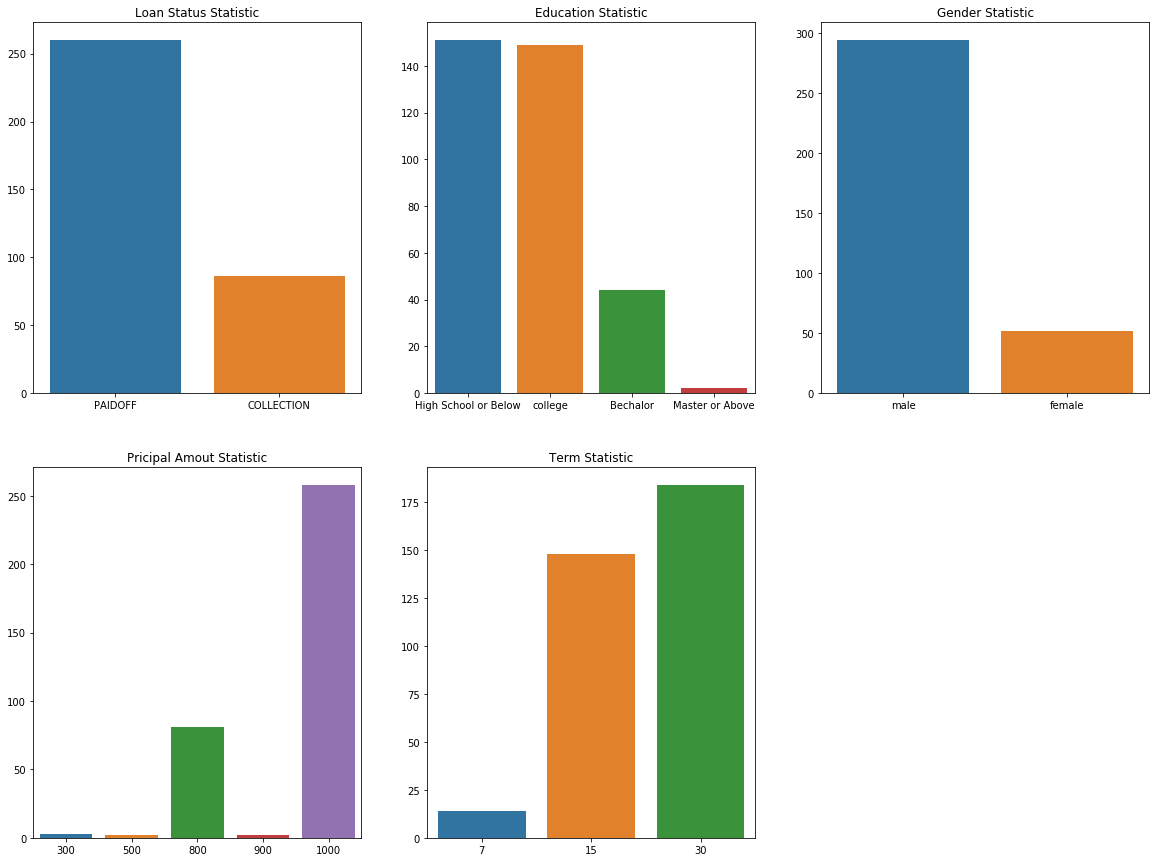

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.title("Loan Status Statistic")
sb.barplot(x = loan_status_count.index, y = loan_status_count.values)
plt.subplot(2,3,2)
plt.title("Education Statistic")
sb.barplot(x = education_count.index, y = education_count.values, orient="v")
plt.subplot(2,3,3)
plt.title("Gender Statistic")
sb.barplot(x = gender_count.index, y = gender_count.values)
plt.subplot(2,3,4)
plt.title("Pricipal Amout Statistic")
sb.barplot(x = principal_count.index, y = principal_count.values)
plt.subplot(2,3,5)
plt.title("Term Statistic")
sb.barplot(x = term_count.index, y = term_count.values)

### As we see these graph.  

## Bi-variate Analysis

#### Continus & Continous: We have one continous variable 'age', so we do not have relationship here

#### Categorical & Categorical:
* education
* Gender
* Principal
* terms

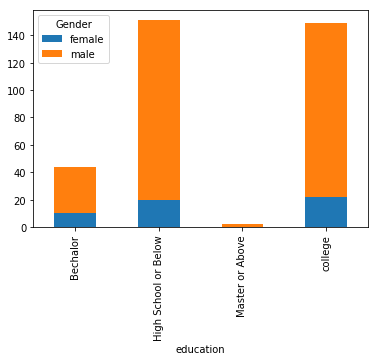

education and Gender are independent


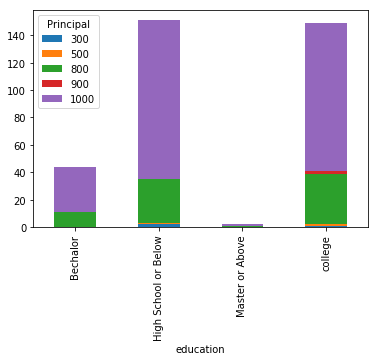

education and Principal are independent


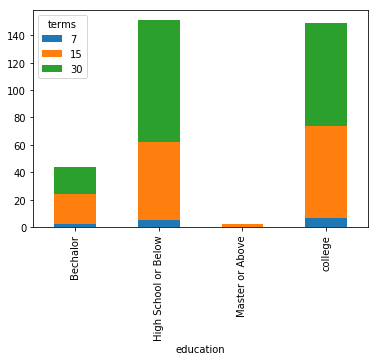

education and terms are independent


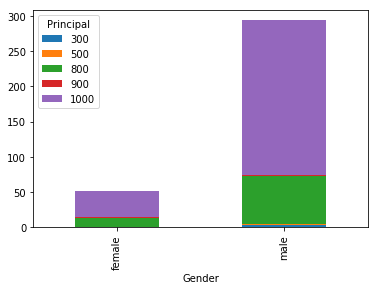

Gender and Principal are independent


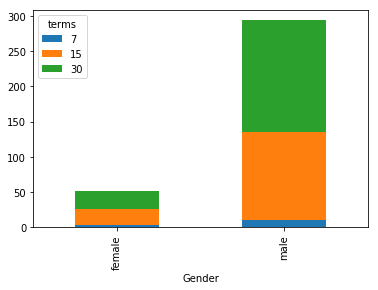

Gender and terms are independent


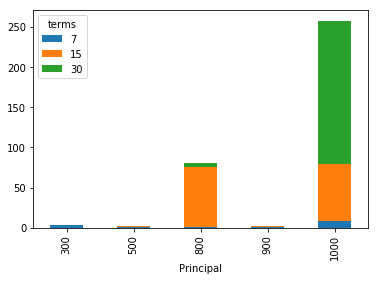

Principal and terms are dependent


In [23]:
category_col = ["education", "Gender", "Principal", "terms"]
len_category_col = len(category_col)
for i in range(0, len_category_col):
    for j in range(i + 1, len_category_col):
        lib.category_and_category(data = dataset, cat1 = category_col[i], cat2 = category_col[j])

### Convert 'due_date', 'effective_date' to date time object 

In [24]:
dataset.due_date = pd.to_datetime(dataset.due_date, format="%m/%d/%Y")
dataset.effective_date = pd.to_datetime(dataset.effective_date, format="%m/%d/%Y")

In [25]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization

How many sample of each class is in our data set?

In [26]:
class_count = dataset.loan_status.value_counts()
class_count

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [27]:
class_percent = class_count / dataset.shape[0]
class_percent

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

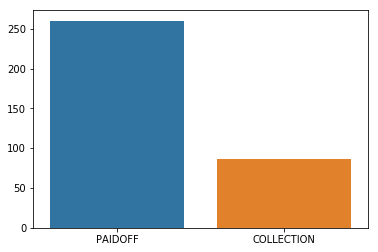

In [28]:
sb.barplot(x = class_count.index, y = class_count.values)

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

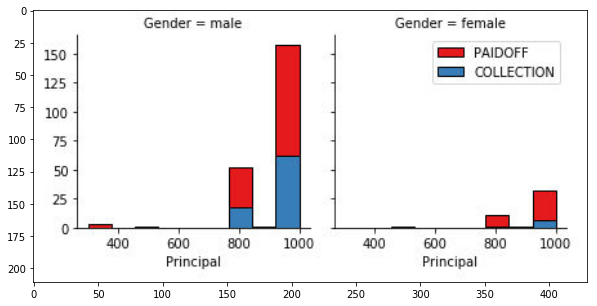

In [31]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

In [32]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

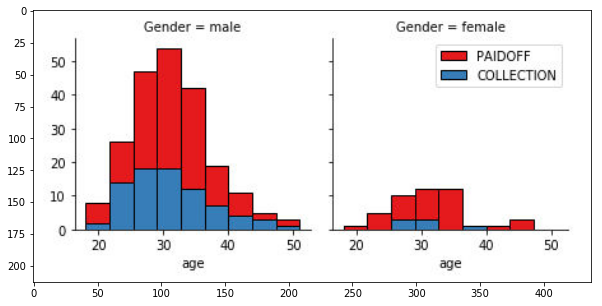

In [33]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

In [34]:
dataset_male = dataset[dataset.Gender == "male"]
dataset_female = dataset[dataset.Gender == "female"]
male_principal_crosstab = pd.crosstab(dataset_male.Principal, dataset_male.loan_status)
female_principal_crosstab = pd.crosstab(dataset_female.Principal, dataset_female.loan_status)

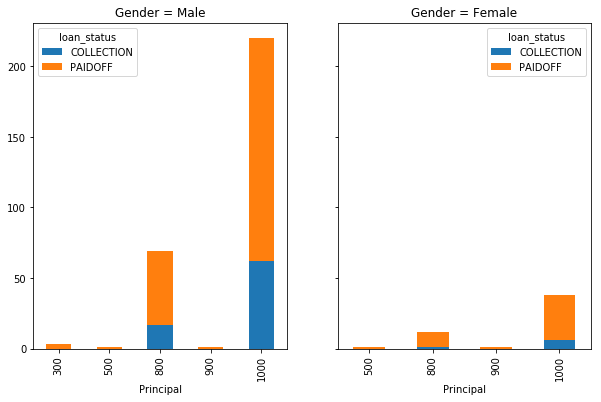

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(10, 6))
male_principal_crosstab.plot(kind = 'bar', stacked = True, ax = ax1, title = "Gender = Male")
female_principal_crosstab.plot(kind = 'bar', stacked = True, ax = ax2, title = "Gender = Female")

In [36]:
male_age_crosstab = pd.crosstab(dataset_male.age, dataset_male.loan_status)
female_age_crosstab = pd.crosstab(dataset_female.age, dataset_female.loan_status)

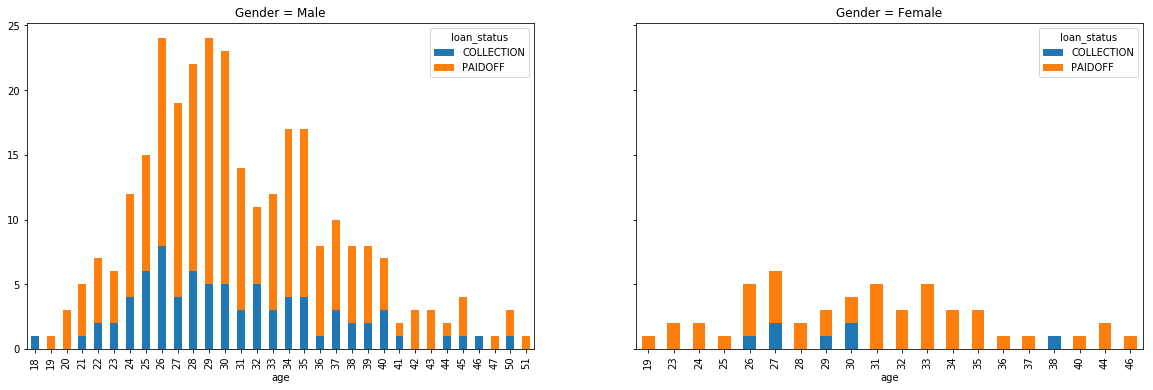

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,  figsize=(20, 6))
male_age_crosstab.plot(kind = 'bar', stacked = True, ax = ax1, title = "Gender = Male")
female_age_crosstab.plot(kind = 'bar', stacked = True, ax = ax2, title = "Gender = Female")

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [38]:
dataset['dayofweek'] = dataset.effective_date.dt.dayofweek

In [39]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


Lets plot some columns to underestand data better:

In [40]:
img3 = np.array(Image.open('day_of_week.jpg'))

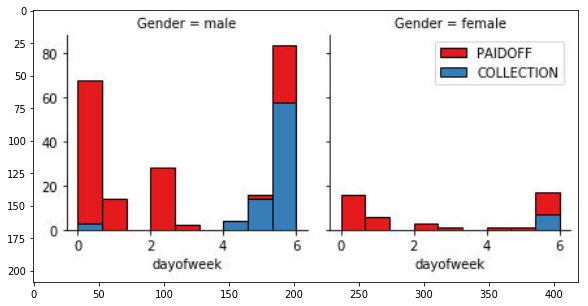

In [41]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

In [42]:
groupby_male = dataset[dataset.Gender == "male"]
groupby_female = dataset[dataset.Gender == "female"]
male_dayofweek_crosstab = pd.crosstab(groupby_male.dayofweek, groupby_male.loan_status)
female_dayofweek_crosstab = pd.crosstab(groupby_female.dayofweek, groupby_female.loan_status)

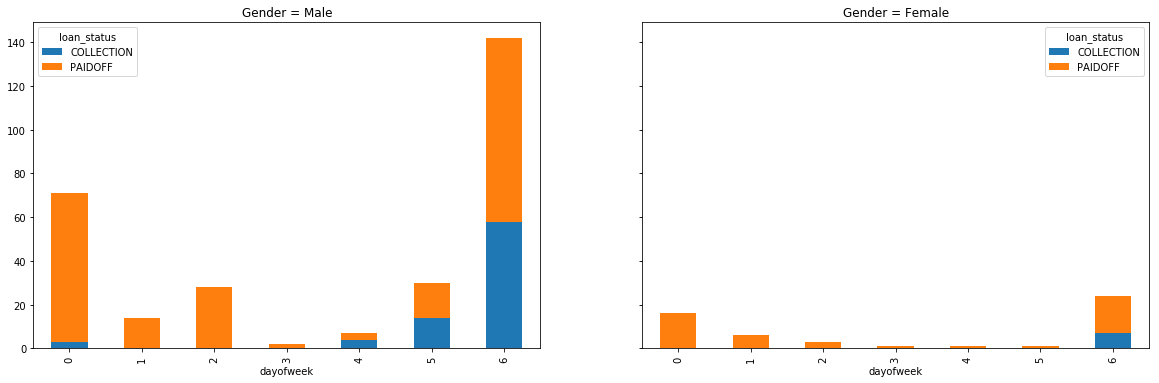

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True,  figsize=(20, 6))
male_dayofweek_crosstab.plot(kind = 'bar', stacked = True, ax = ax1, title = "Gender = Male")
female_dayofweek_crosstab.plot(kind = 'bar', stacked = True, ax = ax2, title = "Gender = Female")

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [44]:
dataset['weekend'] = dataset.dayofweek.apply(lambda day: 1 if day > 3 else 0)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


#### Add new columns: loan_day
This column caculate the amount of days for each loan status from effective day to due date

In [45]:
dataset['loan_day'] = (dataset.due_date - dataset.effective_date).dt.days
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_day
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,29
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,29
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,14
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,29
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,29


In [46]:
loan_day_count = dataset.loan_day.unique()
loan_day_count

array([29, 14,  6, 13, 59, 44])

In [47]:
loan_status_by_loan_day = dataset.groupby(by=['loan_day'])['loan_status'].value_counts()
loan_status_by_loan_day = loan_status_by_loan_day.rename('count')
loan_status_by_loan_day = loan_status_by_loan_day.reset_index(level=['loan_day', 'loan_status'])
loan_status_by_loan_day

,loan_day,loan_status,count
0,6,PAIDOFF,11
1,13,PAIDOFF,3
2,14,PAIDOFF,109
3,14,COLLECTION,30
4,29,PAIDOFF,127
5,29,COLLECTION,49
6,44,PAIDOFF,3
7,44,COLLECTION,2
8,59,PAIDOFF,7
9,59,COLLECTION,5


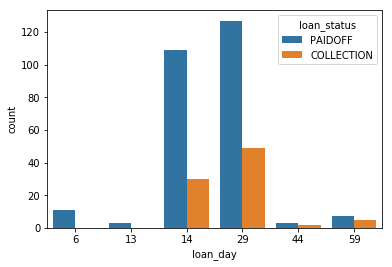

In [48]:
sb.barplot(x = 'loan_day', y = 'count', hue = 'loan_status', data = loan_status_by_loan_day)

### As you see on the graph above, the longer loan day and the higher percent COLLECTION

## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [49]:
gender_groupby = dataset.groupby(by = "Gender")['loan_status'].value_counts()
gender_groupby

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

**86** % of female pay there loans while only **73** % of males pay there loan

Lets convert male to 0 and female to 1:


In [50]:
dataset.Gender = dataset.Gender.map({"male": 0, "female": 1})
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_day
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,29
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,29
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,14
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,29
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,29


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [51]:
education_groupby = dataset.groupby(by = "education")['loan_status'].value_counts()
education_groupby

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [52]:
dataset[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college
6,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'
- Add new column loan_day

In [53]:
feature = dataset[['Principal','terms','age','Gender','weekend', 'education', 'loan_day']]
feature.head()

,Principal,terms,age,Gender,weekend,education,loan_day
0,1000,30,45,0,0,High School or Below,29
2,1000,30,33,1,0,Bechalor,29
3,1000,15,27,0,0,college,14
4,1000,30,28,1,1,college,29
6,1000,30,29,0,1,college,29


In [54]:
feature = pd.get_dummies(feature, columns = ['education'])
del feature['education_Master or Above']

In [55]:
feature.head()

,Principal,terms,age,Gender,weekend,loan_day,education_Bechalor,education_High School or Below,education_college
0,1000,30,45,0,0,29,0,1,0
2,1000,30,33,1,0,29,1,0,0
3,1000,15,27,0,0,14,0,0,1
4,1000,30,28,1,1,29,0,0,1
6,1000,30,29,0,1,29,0,0,1


In [56]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_day
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,29
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,29
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,14
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,29
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,29


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [57]:
x = feature
x.shape

(346, 9)

What are our lables?
- y is output, y = 'loan_status' column

In [58]:
y = dataset[['loan_status']]
y.shape

(346, 1)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

### As we analyze above, we have one continous variable age and the other are category variable. In addition, 
### we will use Logistic Regression that use propability to classify result. So there no need to apply scaler 
### in this dataset.

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
x_train = x
y_train = y
lr = LogisticRegression()
lr.fit(x_train, y_train)

/home/dat-tran/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dat-tran/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation using Test set

In [61]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
# and the others libraries...

### Load Test set for evaluation 

In [62]:
# Read CSV file: loan_test.csv
# code here

In [63]:
# Model Evaluation

In [64]:
test_dataset = pd.read_csv("loan_test.csv", index_col=0)
test_dataset.head()

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [65]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1 to 396
Data columns (total 9 columns):
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(4), object(5)
memory usage: 4.2+ KB


In [66]:
test_dataset.shape

(54, 9)

In [67]:
test_dataset = test_dataset.iloc[:,1:]
test_dataset.shape

(54, 8)

In [68]:
test_dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [69]:
test_dataset.due_date = pd.to_datetime(test_dataset.due_date, format="%m/%d/%Y")
test_dataset.effective_date = pd.to_datetime(test_dataset.effective_date, format="%m/%d/%Y")

In [70]:
test_dataset['dayofweek'] = test_dataset.effective_date.dt.dayofweek

In [71]:
test_dataset['weekend'] = test_dataset.dayofweek.apply(lambda day: 1 if day > 3 else 0)
test_dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [72]:
test_dataset['loan_day'] = (test_dataset.due_date - test_dataset.effective_date).dt.days

In [73]:
x_test = test_dataset[['Principal','terms','age','Gender','weekend', 'loan_day', 'education']]
y_test = test_dataset[['loan_status']]

In [74]:
x_test.Gender = x_test.Gender.map({"male": 0, "female": 1})

/home/dat-tran/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
x_test = pd.get_dummies(x_test, columns = ['education'])
del x_test['education_Master or Above']

In [76]:
x_test.head()

,Principal,terms,age,Gender,weekend,loan_day,education_Bechalor,education_High School or Below,education_college
1,1000,30,50,1,0,29,1,0,0
5,300,7,35,0,1,6,0,0,0
21,1000,30,43,1,1,29,0,1,0
24,1000,30,26,0,1,29,0,0,1
35,800,15,29,0,1,14,1,0,0


In [77]:
y_train_pre = lr.predict(x_train)
y_test_pre = lr.predict(x_test)
print("The accuracy of traning:", accuracy_score(y_train, y_train_pre) * 100)
print("The accuracy of testing:", accuracy_score(y_test, y_test_pre) * 100)
print("Score of Scikit Learning:", lr.score(x_test, y_test) * 100)

The accuracy of traning: 74.27745664739885
The accuracy of testing: 72.22222222222221
Score of Scikit Learning: 72.22222222222221


In [78]:
confuse_matrix = confusion_matrix(y_true = y_test, y_pred = y_test_pre)
confuse_matrix

array([[ 2, 12],
       [ 3, 37]])

In [79]:
print(classification_report(y_test, y_test_pre))

              precision    recall  f1-score   support

  COLLECTION       0.40      0.14      0.21        14
     PAIDOFF       0.76      0.93      0.83        40

    accuracy                           0.72        54
   macro avg       0.58      0.53      0.52        54
weighted avg       0.66      0.72      0.67        54



In [80]:
y_train.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### It look like the precision, recall of COLLECTION supper lower. We have problem with COLLECTION, we can resample to balance   both PAIDOFF and COLLECTION

### We have 86 record of COLLECTION, We apply over sampling here to get balance between PAIDOFF and COLLECTION 

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Using TensorFlow backend.
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dat-tran/.local/lib/python3.6/site-packages/tensorflo

In [82]:
y_train_resampled[y_train_resampled == "PAIDOFF"].size

260

In [83]:
y_train_resampled[y_train_resampled == "COLLECTION"].size

260

In [84]:
model_resampling = LogisticRegression()
model_resampling.fit(x_train_resampled, y_train_resampled)

/home/dat-tran/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_train_resample_pre = model_resampling.predict(x_train_resampled)
y_test_pre = model_resampling.predict(x_test)
print("The accuracy of traning:", accuracy_score(y_train_resampled, y_train_resample_pre) * 100)
print("The accuracy of testing:", accuracy_score(y_test, y_test_pre) * 100)
print("Score of Scikit Learning:", model_resampling.score(x_test, y_test) * 100)

The accuracy of traning: 79.61538461538461
The accuracy of testing: 68.51851851851852
Score of Scikit Learning: 68.51851851851852


In [86]:
confuse_matrix = confusion_matrix(y_true = y_test, y_pred = y_test_pre)
confuse_matrix

array([[ 7,  7],
       [10, 30]])

In [87]:
print(classification_report(y_test, y_test_pre))

              precision    recall  f1-score   support

  COLLECTION       0.41      0.50      0.45        14
     PAIDOFF       0.81      0.75      0.78        40

    accuracy                           0.69        54
   macro avg       0.61      0.62      0.62        54
weighted avg       0.71      0.69      0.69        54



In [88]:
confuse_matrix_detail = classification_report(y_test, y_test_pre, output_dict = True)

In [89]:
report = pd.DataFrame({"Algorithm": ["LogisticRegression"], 
                       "Accuracy Score": [confuse_matrix_detail['accuracy'] * 100],
                       "F1-score": [model_resampling.score(x_test, y_test) * 100]})
report

,Algorithm,Accuracy Score,F1-score
0,LogisticRegression,68.518519,68.518519


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | F1-score |
|--------------------|---------|----------|
| LogisticRegression | ?       | ?        |

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>